<a href="https://colab.research.google.com/github/Lotfullah21/Data-Analysis/blob/main/K_Means_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## data

In [1]:
!wget -O Cust_Segmentation.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv

--2022-06-28 12:14:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33426 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  32.64K  --.-KB/s    in 0.04s   

2022-06-28 12:15:00 (744 KB/s) - ‘Cust_Segmentation.csv’ saved [33426/33426]



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:

customer_data = pd.read_csv("Cust_Segmentation.csv")
customer_data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


# Lets non_numeric data

In [17]:
c_data = customer_data.drop("Address",axis = 1)
c_data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


#### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.


In [39]:
from sklearn.preprocessing import StandardScaler
X = c_data.values[:,1:]
X = np.nan_to_num(X)
cluster_data = StandardScaler().fit_transform(X)
cluster_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.67169003,
        -0.67169003, -0.67169003],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  0.0967306 ,
         0.0967306 ,  0.0967306 ],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  1.63357185,
         1.63357185,  1.63357185],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ..., -0.67169003,
        -0.67169003, -0.67169003],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.67169003,
        -0.67169003, -0.67169003],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  1.63357185,
         1.63357185,  1.63357185]])

## Applying K_Means

In [27]:
from sklearn.cluster import KMeans
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 3 0 2 3 3 3 0 1 3 0 0 0 0 0 0 0 3 0 0 0 0 3 1 3 0 0 3 0 1 3 0 0 0 0 0
 0 0 1 0 1 0 1 0 3 0 0 0 3 3 0 0 3 3 0 0 0 3 0 3 0 3 3 0 0 3 0 0 0 3 3 1 0
 0 0 3 0 1 3 3 3 1 0 3 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 1 3 3 0 3 0 0 3 3 3
 0 0 0 0 0 0 3 3 0 0 0 0 3 0 3 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 3 0 3 0
 0 0 0 0 0 0 3 0 1 1 0 3 0 0 3 3 0 0 3 0 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 1 0
 0 0 0 0 3 0 0 3 0 3 0 0 3 2 0 1 0 0 0 0 3 0 2 1 0 0 3 3 3 0 0 3 3 3 3 0 1
 0 0 0 0 1 0 0 3 0 0 3 0 3 0 0 0 3 0 0 0 0 0 0 1 3 3 0 0 0 0 0 0 3 0 0 0 0
 0 0 3 3 3 3 0 0 3 0 0 0 0 0 3 0 0 0 3 0 0 0 1 1 0 1 0 3 0 1 3 0 0 0 0 0 0
 0 0 0 3 3 3 0 0 0 3 3 0 0 0 3 0 0 0 3 0 0 0 0 0 3 0 3 0 0 3 0 0 1 3 3 1 0
 0 3 0 0 3 0 3 0 3 0 0 3 0 0 3 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 3 0 3 1 1 3
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0
 3 1 0 0 3 0 0 0 0 3 0 3 0 3 3 0 0 3 0 0 0 0 0 3 0 0 0 3 0 0 0 3 3 3 0 0 2
 3 0 3 3 3 0 3 0 0 0 1 0 0 0 0 3 0 1 0 0 0 0 3 0 3 3 3 0 3 1 3 0 3 0 0 0 3
 0 3 0 0 0 0 1 0 0 0 3 0 

In [31]:
c_data["clus_assign"] = labels
c_data.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km,Clus_dkm,clus_assign
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0,0,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1,1,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,3,3,3
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0,0,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2,2,2


In [32]:
c_data.groupby('clus_assign').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km,Clus_dkm
clus_assign,,,,,,,,,,,
0,433.456172,32.050089,1.611807,5.445438,28.048301,0.930440,1.896669,0.296774,10.122898,0.0,0.0
1,399.150000,43.416667,2.183333,19.483333,123.400000,3.836667,7.340467,0.108696,9.036667,1.0,1.0
2,453.500000,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000,2.0,2.0
3,411.262443,39.764706,1.805430,12.923077,62.814480,2.312855,4.445878,0.203297,10.691855,3.0,3.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


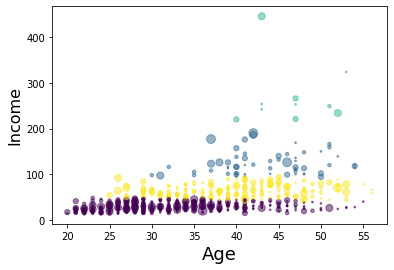

In [40]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


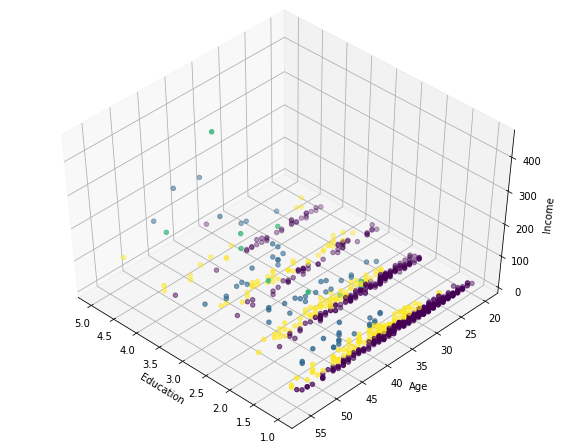

In [41]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))
